In [1]:
# only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
pr_table = pd.DataFrame(columns=['classifiers', 'Recall','Precision'])

In [2]:
data = pd.read_csv("value_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FI_ID            3196 non-null   int64  
 1   GENDER           3196 non-null   int64  
 2   AGE              3196 non-null   int64  
 3   EDUCATION        3196 non-null   int64  
 4   ETHGRP           3184 non-null   float64
 5   MARITLST         3196 non-null   int64  
 6   SPARTNER         3196 non-null   int64  
 7   OTHER_IMP        3196 non-null   int64  
 8   OTHER_HH         3196 non-null   int64  
 9   RLTHAPPY         3196 non-null   int64  
 10  SPTIME           3196 non-null   int64  
 11  SPOPEN2          3196 non-null   int64  
 12  SPRELY2          3196 non-null   int64  
 13  SPDEMAND2        3196 non-null   int64  
 14  SPCRITZE2        3196 non-null   int64  
 15  FAMOPEN2         3196 non-null   int64  
 16  FAMRELY2         3196 non-null   int64  
 17  FAMDEMAN2     

In [3]:
data = data.dropna()
data = data[data["ETHGRP"] != 4]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3195
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FI_ID            3111 non-null   int64  
 1   GENDER           3111 non-null   int64  
 2   AGE              3111 non-null   int64  
 3   EDUCATION        3111 non-null   int64  
 4   ETHGRP           3111 non-null   float64
 5   MARITLST         3111 non-null   int64  
 6   SPARTNER         3111 non-null   int64  
 7   OTHER_IMP        3111 non-null   int64  
 8   OTHER_HH         3111 non-null   int64  
 9   RLTHAPPY         3111 non-null   int64  
 10  SPTIME           3111 non-null   int64  
 11  SPOPEN2          3111 non-null   int64  
 12  SPRELY2          3111 non-null   int64  
 13  SPDEMAND2        3111 non-null   int64  
 14  SPCRITZE2        3111 non-null   int64  
 15  FAMOPEN2         3111 non-null   int64  
 16  FAMRELY2         3111 non-null   int64  
 17  FAMDEMAN2     

In [4]:
data = data.drop(["FI_ID","MOCA_SCORE","MOCA_SCORE_CCFM", "EDUCATION", "ETHGRP"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3195
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GENDER       3111 non-null   int64
 1   AGE          3111 non-null   int64
 2   MARITLST     3111 non-null   int64
 3   SPARTNER     3111 non-null   int64
 4   OTHER_IMP    3111 non-null   int64
 5   OTHER_HH     3111 non-null   int64
 6   RLTHAPPY     3111 non-null   int64
 7   SPTIME       3111 non-null   int64
 8   SPOPEN2      3111 non-null   int64
 9   SPRELY2      3111 non-null   int64
 10  SPDEMAND2    3111 non-null   int64
 11  SPCRITZE2    3111 non-null   int64
 12  FAMOPEN2     3111 non-null   int64
 13  FAMRELY2     3111 non-null   int64
 14  FAMDEMAN2    3111 non-null   int64
 15  FAMCRITZ2    3111 non-null   int64
 16  FROPEN2      3111 non-null   int64
 17  FRRELY2      3111 non-null   int64
 18  FRDEMN2      3111 non-null   int64
 19  FRCRITZ2     3111 non-null   int64
 20  FRAMT   

In [5]:
data.describe()

,GENDER,AGE,MARITLST,SPARTNER,OTHER_IMP,OTHER_HH,RLTHAPPY,SPTIME,SPOPEN2,SPRELY2,...,FRRELY2,FRDEMN2,FRCRITZ2,FRAMT,PAR_NERVE,FAM_NERVE,FR_NERVE,PAR_THREAT,FAMFRTHREAT,IMPAIRED
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,...,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000
mean,1.527162,73.171006,2.204436,-2.022179,0.480874,0.144327,3.721311,0.364834,1.083574,1.189650,...,2.000643,0.460945,0.369013,3.202507,-0.385085,0.409836,0.218901,-1.134041,-0.539376,0.486339
std,0.499342,7.348579,1.772964,1.456273,0.512422,0.354211,4.330234,2.177118,2.593727,2.643448,...,1.190260,0.787565,0.951623,1.512055,2.273903,2.253290,2.149847,1.606368,1.790016,0.499894
min,1.000000,62.000000,1.000000,-3.000000,-2.000000,-2.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-4.000000,-5.000000,-5.000000,-4.000000,-5.000000,0.000000
25%,1.000000,67.000000,1.000000,-3.000000,0.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,2.000000,0.000000,0.000000,2.000000,-3.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
50%,2.000000,72.000000,1.000000,-3.000000,0.000000,0.000000,6.000000,1.000000,3.000000,3.000000,...,2.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,79.000000,4.000000,0.000000,1.000000,0.000000,7.000000,2.000000,3.000000,3.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,91.000000,6.000000,1.000000,1.000000,1.000000,7.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000


In [6]:
ss=data.drop(["IMPAIRED"],axis=1)

In [7]:
ss.head()

,GENDER,AGE,MARITLST,SPARTNER,OTHER_IMP,OTHER_HH,RLTHAPPY,SPTIME,SPOPEN2,SPRELY2,...,FROPEN2,FRRELY2,FRDEMN2,FRCRITZ2,FRAMT,PAR_NERVE,FAM_NERVE,FR_NERVE,PAR_THREAT,FAMFRTHREAT
0,2,67,2,-3,0,0,6,1,3,3,...,1,0,1,-2,5,2,2,1,0,0
1,2,84,5,0,1,0,-3,-3,-3,-3,...,0,2,0,1,3,-3,0,0,-3,0
2,2,65,1,-3,1,1,7,1,3,3,...,2,3,1,1,2,1,2,1,0,0
3,1,65,1,-3,0,0,7,1,3,3,...,1,3,0,0,5,1,1,1,0,0
4,2,70,1,-3,1,0,7,1,3,3,...,3,3,1,0,3,0,0,0,0,0


In [8]:
 data_onehot = pd.get_dummies(ss["GENDER"],prefix="GENDER")

In [9]:
data_onehot.head()

,GENDER_1,GENDER_2
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [10]:
for x in ss.columns[2:]:
    data_onehot=pd.concat([data_onehot,pd.get_dummies(ss[x],prefix=x)],axis=1)

In [11]:
data_onehot.head()

,GENDER_1,GENDER_2,MARITLST_1,MARITLST_2,MARITLST_3,MARITLST_4,MARITLST_5,MARITLST_6,SPARTNER_-3,SPARTNER_0,...,PAR_THREAT_0,PAR_THREAT_1,PAR_THREAT_2,PAR_THREAT_3,FAMFRTHREAT_-5,FAMFRTHREAT_-4,FAMFRTHREAT_0,FAMFRTHREAT_1,FAMFRTHREAT_2,FAMFRTHREAT_3
0,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [12]:
data_onehot['AGE']=data['AGE']

In [13]:
data_onehot.head()

,GENDER_1,GENDER_2,MARITLST_1,MARITLST_2,MARITLST_3,MARITLST_4,MARITLST_5,MARITLST_6,SPARTNER_-3,SPARTNER_0,...,PAR_THREAT_1,PAR_THREAT_2,PAR_THREAT_3,FAMFRTHREAT_-5,FAMFRTHREAT_-4,FAMFRTHREAT_0,FAMFRTHREAT_1,FAMFRTHREAT_2,FAMFRTHREAT_3,AGE
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,67
1,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,84
2,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,65
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,65
4,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,70


In [14]:
data['IMPAIRED'].value_counts()

0    1598
1    1513
Name: IMPAIRED, dtype: int64

In [15]:
corr_matrix = data.corr()
corr_matrix["IMPAIRED"].sort_values(ascending=False)

IMPAIRED       1.000000
AGE            0.186726
MARITLST       0.132307
SPARTNER       0.131429
OTHER_HH       0.130082
GENDER         0.003097
FAMOPEN2      -0.007227
FAMCRITZ2     -0.036089
FAMRELY2      -0.051008
OTHER_IMP     -0.068491
FAMDEMAN2     -0.075616
FRDEMN2       -0.086091
FRCRITZ2      -0.107010
FROPEN2       -0.107264
FAMFRTHREAT   -0.111008
SPDEMAND2     -0.113681
PAR_THREAT    -0.122608
FAM_NERVE     -0.123057
RLTHAPPY      -0.123490
FR_NERVE      -0.124524
SPOPEN2       -0.124851
SPCRITZE2     -0.125209
SPTIME        -0.127927
SPRELY2       -0.129436
PAR_NERVE     -0.139842
FRAMT         -0.153310
FRRELY2       -0.166971
Name: IMPAIRED, dtype: float64

<AxesSubplot:>

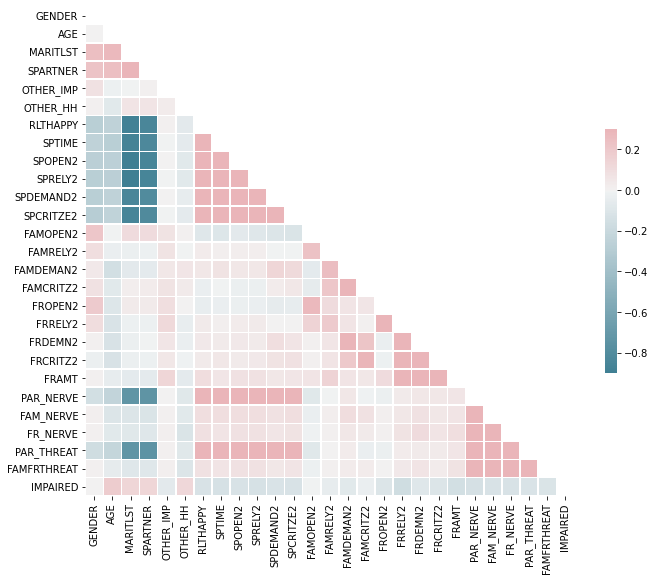

In [16]:
import seaborn as sns
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
x = data_onehot
y = data["IMPAIRED"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)

In [18]:
# import statsmodels.api as sm
# #x = sm.add_constant(x)
# logit_mod=sm.Logit(y,x)
# result=logit_mod.fit()
# print(result.summary())

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-0.95186436,  0.95186436,  0.71348134, ..., -0.16247102,
        -0.046344  ,  0.52266095],
       [ 1.05056986, -1.05056986,  0.71348134, ...,  6.15494381,
        -0.046344  ,  0.25041982],
       [ 1.05056986, -1.05056986,  0.71348134, ..., -0.16247102,
        -0.046344  ,  0.65878151],
       ...,
       [ 1.05056986, -1.05056986,  0.71348134, ..., -0.16247102,
        -0.046344  ,  1.61162544],
       [-0.95186436,  0.95186436,  0.71348134, ..., -0.16247102,
        -0.046344  , -0.56630354],
       [-0.95186436,  0.95186436, -1.40157834, ..., -0.16247102,
        -0.046344  ,  1.33938431]])

### KNN Model

In [20]:
# CV for KNN, to understnad whether model is overfitted
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5, scoring = "roc_auc")
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.66919971 0.61298642 0.61519824 0.60553333 0.61597515]
cv_scores mean:0.6237785698486719
ROC AUC: 0.62 (+/- 0.02)


In [21]:
# predictions with CV fitted model
knn_cv.fit(x_train, y_train)
y_pred = knn_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#pr_table.set_index('classifiers', inplace=True)

[[254 146]
 [178 200]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       400
           1       0.58      0.53      0.55       378

    accuracy                           0.58       778
   macro avg       0.58      0.58      0.58       778
weighted avg       0.58      0.58      0.58       778

0.5820502645502645


In [22]:

#create new a knn model
knn = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
grid_search = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [23]:
grid_search.best_params_

{'n_neighbors': 23}

In [24]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[295 105]
 [191 187]]
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       400
           1       0.64      0.49      0.56       378

    accuracy                           0.62       778
   macro avg       0.62      0.62      0.61       778
weighted avg       0.62      0.62      0.61       778



0.6161044973544975

### SVM Model

In [25]:
svc_cv = SVC(kernel='rbf', gamma= 'auto')
cv_scores = cross_val_score(svc_cv, x_train, y_train, cv=5, scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.70952643 0.72129222 0.72044787 0.72206145 0.68198994]
cv_scores mean:0.7110635817374155
ROC AUC: 0.71 (+/- 0.02)


In [26]:
# predictions with CV fitted model of SVM
svc_cv.fit(x_train, y_train)
y_pred = svc_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#result_table.set_index('classifiers', inplace=True)

[[283 117]
 [153 225]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       400
           1       0.66      0.60      0.62       378

    accuracy                           0.65       778
   macro avg       0.65      0.65      0.65       778
weighted avg       0.65      0.65      0.65       778

0.6513690476190477


In [27]:
from sklearn.model_selection import GridSearchCV 
svc = SVC() 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_search = GridSearchCV(svc, param_grid, cv=5) 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [28]:
grid_search.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [29]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[285 115]
 [153 225]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       400
           1       0.66      0.60      0.63       378

    accuracy                           0.66       778
   macro avg       0.66      0.65      0.65       778
weighted avg       0.66      0.66      0.65       778



0.6538690476190476

### Random Forest Model

In [30]:
rf_cv = RandomForestClassifier(max_depth=20, max_features=20, n_estimators=1000)
cv_scores = cross_val_score(rf_cv, x_train, y_train, cv=5,scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.71136197 0.70512115 0.7117199  0.70589645 0.66188045]
cv_scores mean:0.6991959814818227
ROC AUC: 0.70 (+/- 0.02)


In [31]:
# predictions with CV fitted model of RF

rf_cv.fit(x_train, y_train)
y_pred = rf_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)



[[277 123]
 [151 227]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       400
           1       0.65      0.60      0.62       378

    accuracy                           0.65       778
   macro avg       0.65      0.65      0.65       778
weighted avg       0.65      0.65      0.65       778

0.6465145502645503


In [32]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': [2, 4, 6, 8, 10, 15],
    'n_estimators': [50, 100, 150, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(rf,param_grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, 40, 50],
                         'max_features': [2, 4, 6, 8, 10, 15],
                         'n_estimators': [50, 100, 150, 200, 300]})

In [33]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 15, 'n_estimators': 300}

In [34]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[284 116]
 [157 221]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.68       400
           1       0.66      0.58      0.62       378

    accuracy                           0.65       778
   macro avg       0.65      0.65      0.65       778
weighted avg       0.65      0.65      0.65       778



0.6473280423280422

In [35]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [36]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(x_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [37]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')


Best params for recall_score
{'max_depth': 25, 'max_features': 20, 'min_samples_split': 3, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       274       126
pos       151       227


In [38]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
75,0.688,0.572,0.665,25,3,5,300
77,0.687,0.577,0.666,25,3,10,300
55,0.685,0.567,0.662,15,5,3,300
49,0.685,0.553,0.658,15,3,3,300
38,0.684,0.544,0.656,5,10,5,100


In [39]:
#prediction with best param
final_model = grid_search_clf.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[274 126]
 [151 227]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       400
           1       0.64      0.60      0.62       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778



0.6427645502645503

###  Build XG-Boost model

In [40]:
!pip install xgboost

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':'XG-Boost',
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':'XG-Boost',
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)

[[256 144]
 [148 230]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       400
           1       0.61      0.61      0.61       378

    accuracy                           0.62       778
   macro avg       0.62      0.62      0.62       778
weighted avg       0.62      0.62      0.62       778

0.6242328042328043


In [43]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = KNeighborsClassifier()
estimators.append(('KNN', model1))
model2 = SVC(kernel='rbf', gamma= 'auto')
estimators.append(('SVC', model2))
model3 = RandomForestClassifier()
estimators.append(('RF', model3))
model4 = XGBClassifier()
estimators.append(('XGB', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results.mean())

C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6536407321815046


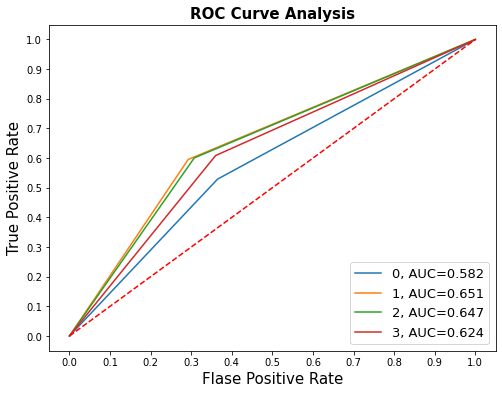

In [44]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='red', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

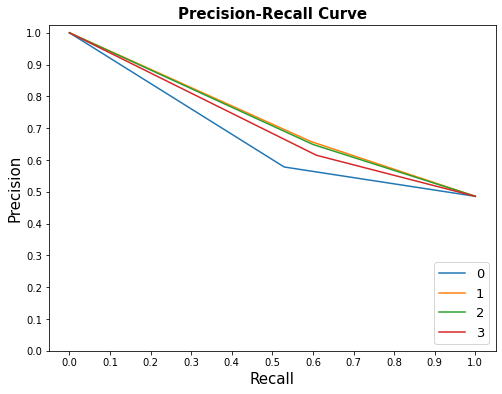

In [45]:
fig = plt.figure(figsize=(8,6))

for i in pr_table.index:
    plt.plot(pr_table.loc[i]['Recall'], 
             pr_table.loc[i]['Precision'],label="{}".format(i))
    
# for i in result_table.index:
#     plt.plot(result_table.loc[i]['fpr'], 
#              result_table.loc[i]['tpr'], 
#              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
    
    #plt.plot([0,1], [0,1], color='red', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision-Recall Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Random Forest feature importance
Feature: GENDER_1, Score: 0.01326
Feature: GENDER_2, Score: 0.01333
Feature: MARITLST_1, Score: 0.00535
Feature: MARITLST_2, Score: 0.00261
Feature: MARITLST_3, Score: 0.00140
Feature: MARITLST_4, Score: 0.00515
Feature: MARITLST_5, Score: 0.00793
Feature: MARITLST_6, Score: 0.00254
Feature: SPARTNER_-3, Score: 0.00418
Feature: SPARTNER_0, Score: 0.00225
Feature: SPARTNER_1, Score: 0.00205
Feature: OTHER_IMP_-2, Score: 0.00037
Feature: OTHER_IMP_-1, Score: 0.00016
Feature: OTHER_IMP_0, Score: 0.01502
Feature: OTHER_IMP_1, Score: 0.01454
Feature: OTHER_HH_-2, Score: 0.00004
Feature: OTHER_HH_0, Score: 0.01095
Feature: OTHER_HH_1, Score: 0.01102
Feature: RLTHAPPY_-3, Score: 0.00217
Feature: RLTHAPPY_-2, Score: 0.00015
Feature: RLTHAPPY_-1, Score: 0.00000
Feature: RLTHAPPY_1, Score: 0.00202
Feature: RLTHAPPY_2, Score: 0.00047
Feature: RLTHAPPY_3, Score: 0.00056
Feature: RLTHAPPY_4, Score: 0.00270
Feature: RLTHAPPY_5, Score: 0.00544
Feature: RLTHAPPY_6, Sco

<AxesSubplot:>

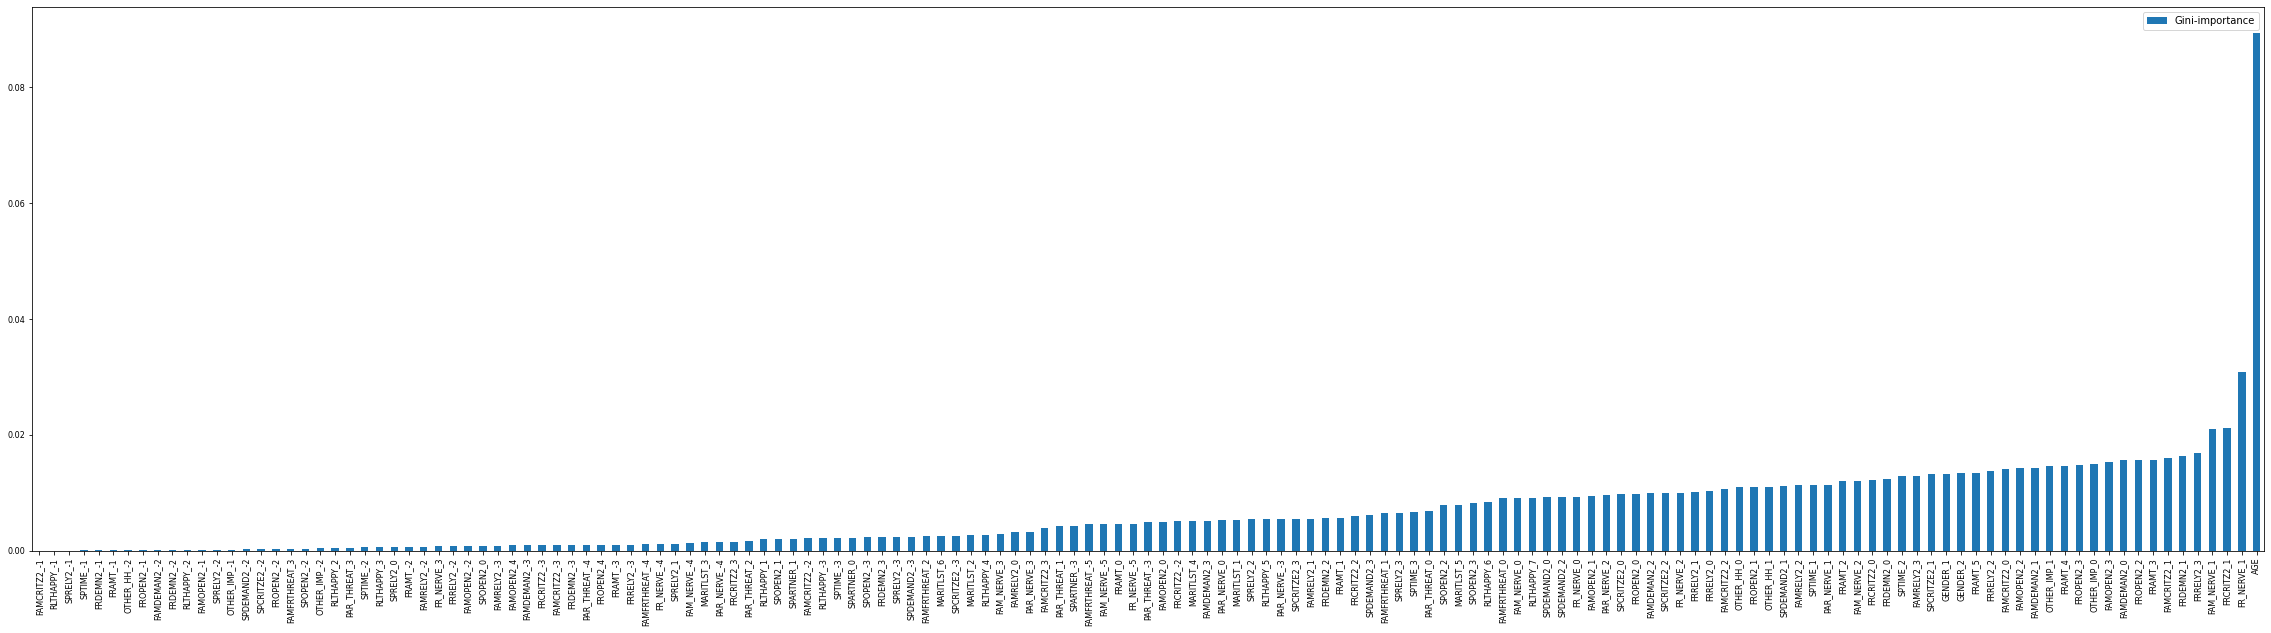

In [55]:
print("Random Forest feature importance")

model = rf_cv
for feature, importance in zip(data_onehot.columns, model.feature_importances_):
	print('Feature: %0s, Score: %.5f' % (feature,importance))
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_onehot.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 10]
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', fontsize = 8, rot='vertical')

In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
from  tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply
from  tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from  tensorflow.keras.layers import LeakyReLU
from  tensorflow.keras.layers import UpSampling2D, Conv2D
from  tensorflow.keras.models import Sequential, Model
from  tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(100, input_shape=x_train.shape[1:]))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(60))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(Dense(30))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [49]:
adam_lr = 0.0002
adam_beta_1 = 0.5
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [50]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
#history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid))

Epoch 1/100
73/73 [==============================] - 2s 13ms/step - loss: 1.1488 - accuracy: 0.4954 - val_loss: 0.6852 - val_accuracy: 0.5103
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.5299 - val_loss: 0.6643 - val_accuracy: 0.6195
Epoch 3/100
73/73 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5851 - val_loss: 0.6579 - val_accuracy: 0.6157
Epoch 4/100
73/73 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.6046 - val_loss: 0.6539 - val_accuracy: 0.6183
Epoch 5/100
73/73 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6228 - val_loss: 0.6375 - val_accuracy: 0.6350
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6364 - val_loss: 0.6385 - val_accuracy: 0.6337
Epoch 7/100
73/73 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.6298 - val_loss: 0.6345 - val_accuracy: 0.6414
Epoch 8/100
